In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [2]:
df=pd.read_csv("Mobile_data.csv")

In [3]:
df

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
...             ...          ...  ..         ...    ...        ...      ...   
1995            794          0.5   0           2    0.8        106        6   
1996           1965          2.6   0          39    0.2        187        4   
1997           1911          0.9   1          36    0.7        108        8   
1998           1512          0.9   4          46    0.1        145        5   
1999            510          2.0   5          45    0.9        168        6   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0      2         20       756  2549     9     7         19            1  
1      6        905      1988  2631    17     3          7            2  
2      6       1263      1716  2603    11     2          9            2  
3      9       1216      1786  2769    16     8         11            2  
4     14       1208      1212  1411     8     2         15            1  
...   ..        ...       ...   ...   ...   ...        ...          ...  
1995  14       1222      1890   668    13     4         19            0  
1996   3        915      1965  2032    11    10         16            2  
1997   3        868      1632  3057     9     1          5            3  
1998   5        336       670   869    18    10         19            0  
1999  16        483       754  3919    19     4          2            3  

[2000 rows x 15 columns]

In [4]:
df.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    140.249000     4.520500     9.916500   645.108000  1251.515500   
std      35.399655     2.287837     6.064315   443.780811   432.199447   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   282.750000   874.750000   
50%     141.000000     4.000000    10.000000   564.000000  1247.000000   
75%     170.000000     7.000000    15.000000   947.250000  1633.000000   
max     200.000000     8.000000    20.000000  1960.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   2124.213000    12.306500     5.767000    11.011000     1.500000  
std    1084.732044     4.213245     4.356398     5.463955     1.118314  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1207.500000     9.000000     2.000000     6.000000     0.750000  
50%    2146.500000    12.000000     5.000000    11.000000     1.500000  
75%    3064.500000    16.000000     9.000000    16.000000     2.250000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

In [5]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [6]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [7]:
df.shape

(2000, 15)

In [8]:
x=df.drop(["price_range"],axis=1)
y=df["price_range"]

In [9]:
XScaled  = x.apply(zscore)
XScaled.describe()

battery_power   clock_speed            fc    int_memory         m_dep  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean    2.149392e-16 -1.545430e-16  5.861978e-17 -9.592327e-17 -1.030287e-16   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -1.678817e+00 -1.253064e+00 -9.928904e-01 -1.656260e+00 -1.393304e+00   
25%    -8.804033e-01 -1.007906e+00 -7.624947e-01 -8.845346e-01 -1.046495e+00   
50%    -2.849593e-02 -2.727384e-02 -3.017032e-01 -2.563229e-03 -6.069151e-03   
75%     8.575560e-01  8.307794e-01  6.198797e-01  8.794082e-01  1.034357e+00   
max     1.728812e+00  1.811412e+00  3.384628e+00  1.761380e+00  1.727974e+00   

          mobile_wt       n_cores            pc     px_height      px_width  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.278977e-16 -7.727152e-17  1.403322e-16  1.181277e-16  6.084022e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.702391e+00 -1.539175e+00 -1.635631e+00 -1.454027e+00 -1.739251e+00   
25%   -8.829695e-01 -6.647678e-01 -8.109291e-01 -8.167289e-01 -8.719579e-01   
50%    2.122020e-02 -2.275644e-01  1.377252e-02 -1.828116e-01 -1.045034e-02   
75%    8.406421e-01  1.084046e+00  8.384742e-01  6.810064e-01  8.828792e-01   
max    1.688320e+00  1.521249e+00  1.663176e+00  2.963672e+00  1.727608e+00   

                ram          sc_h          sc_w     talk_time  
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  
mean  -1.811884e-16  4.884981e-17 -5.506706e-17  1.421085e-16  
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  
min   -1.722711e+00 -1.734608e+00 -1.324131e+00 -1.649584e+00  
25%   -8.453168e-01 -7.849833e-01 -8.649215e-01 -9.173306e-01  
50%    2.055123e-02 -7.276497e-02 -1.761069e-01 -2.013697e-03  
75%    8.670548e-01  8.768595e-01  7.423125e-01  9.133032e-01  
max    1.727851e+00  1.589078e+00  2.808756e+00  1.645557e+00

In [10]:
df["price_range"]=df["price_range"].map({0:"low cost",1:"medium cost",2:"high cost",3:"very highcost"})

### DATA VISUALIZATION

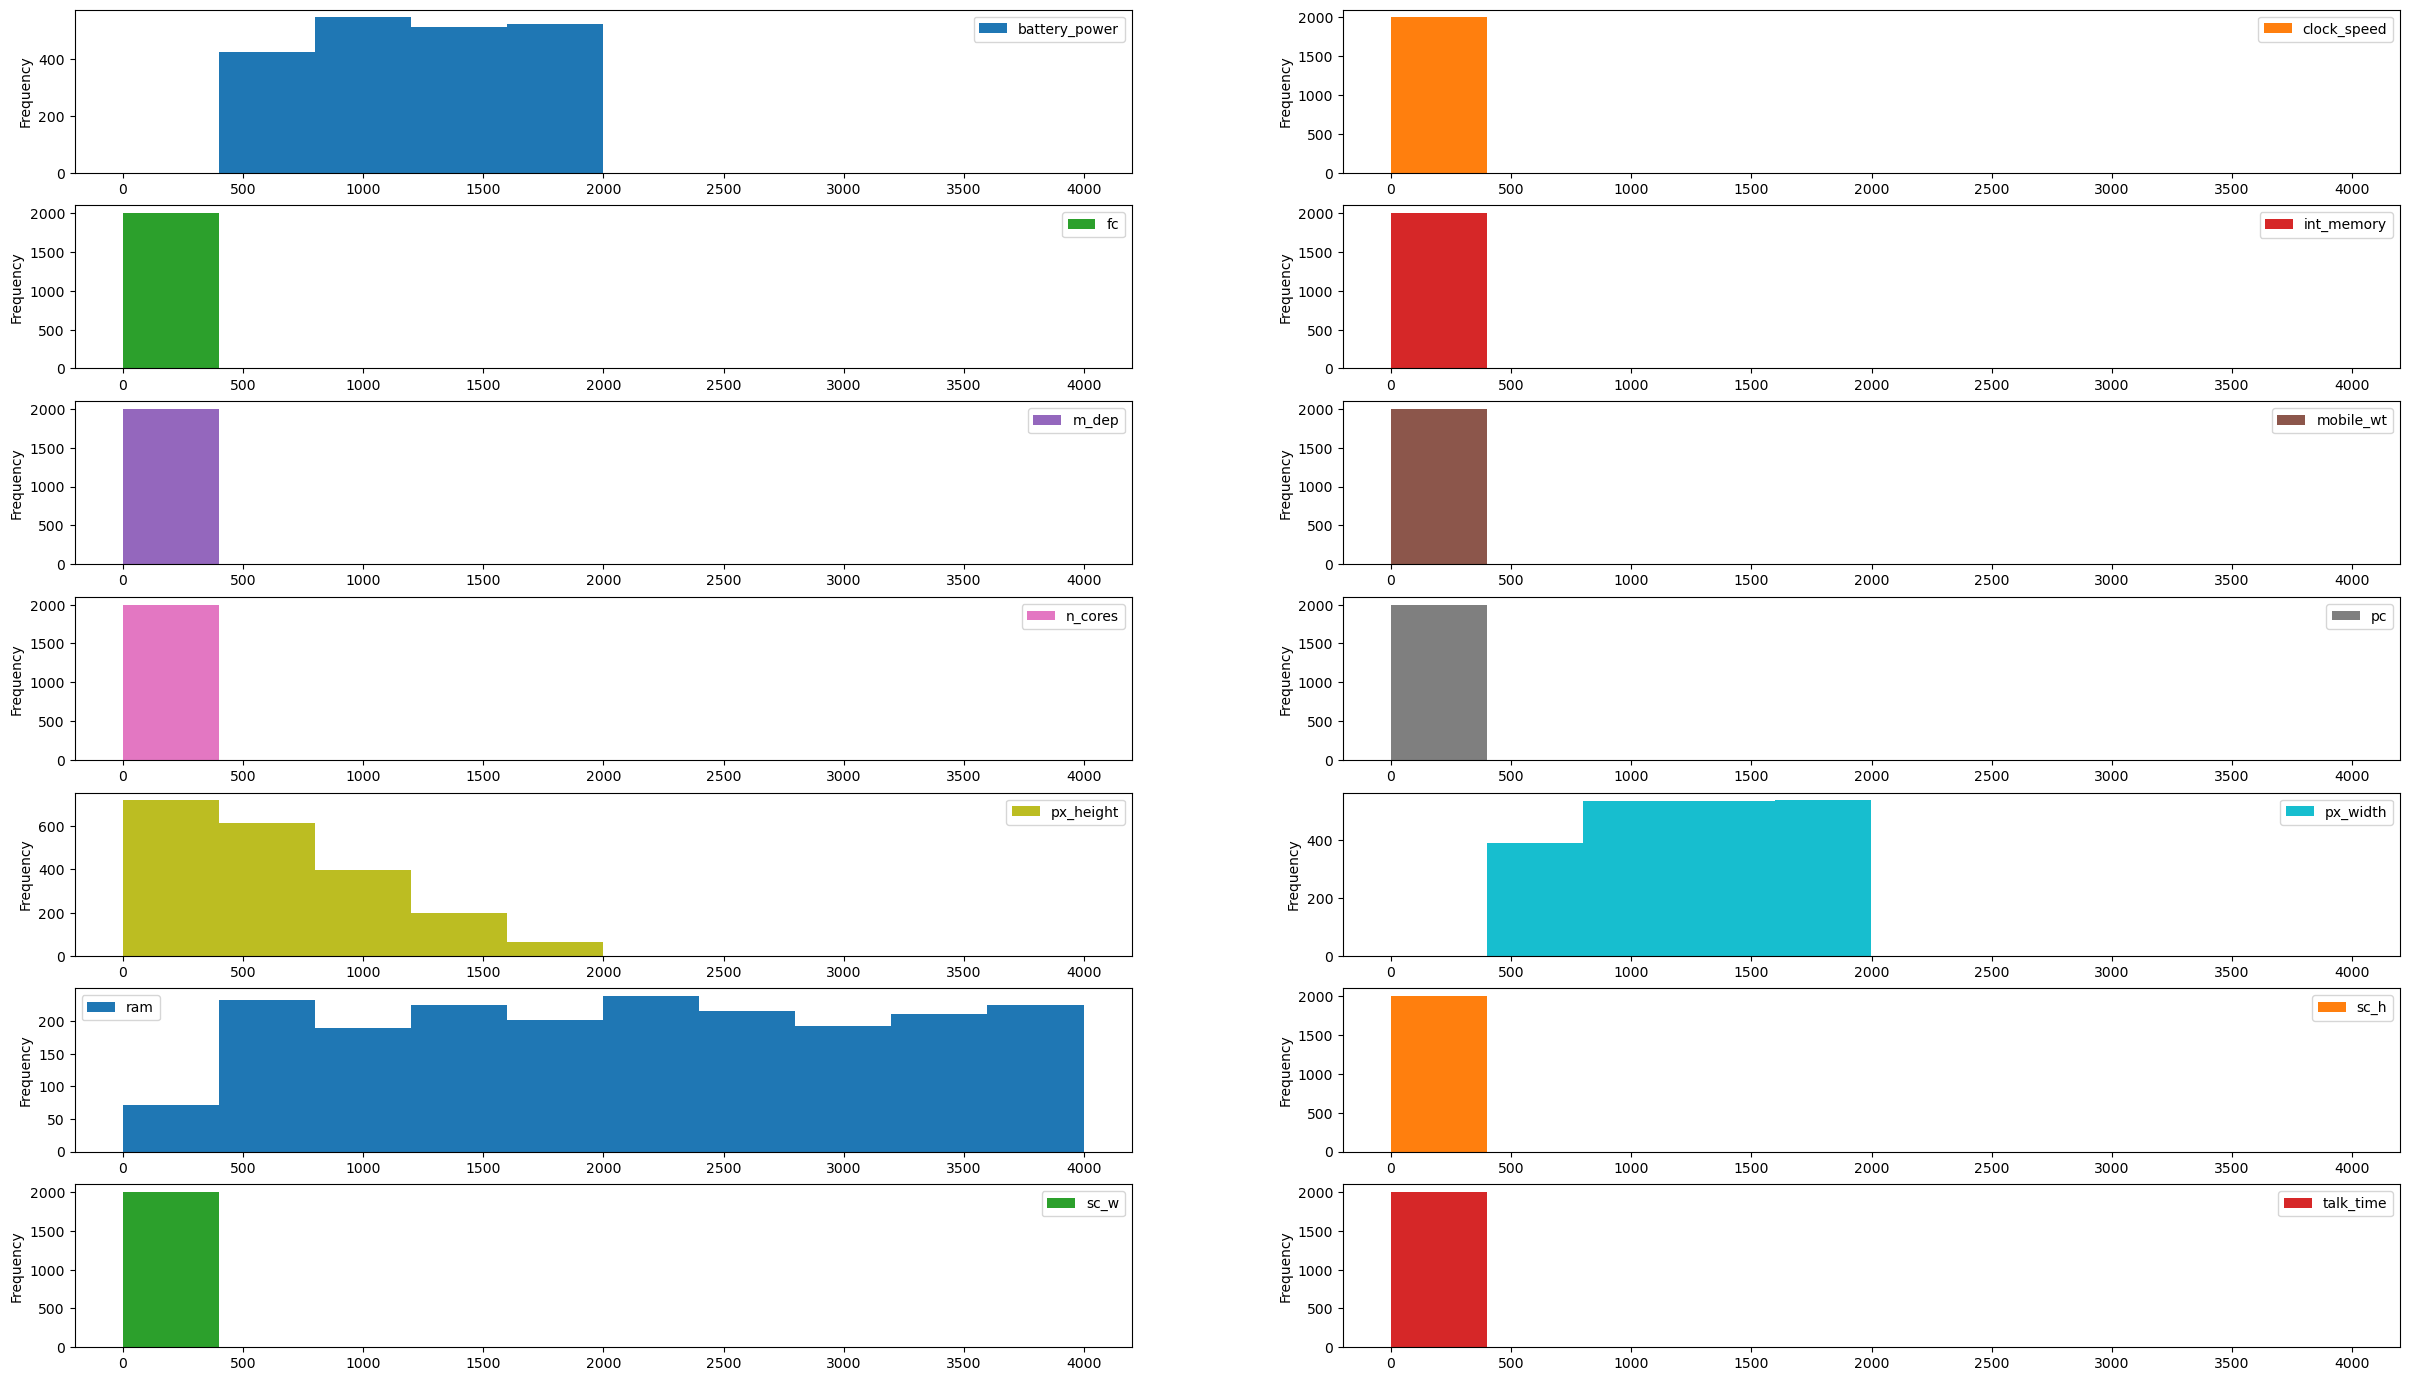

In [11]:
plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist', bins=10, subplots=True, layout=(10,2), sharex=False, sharey=False)
plt.show()

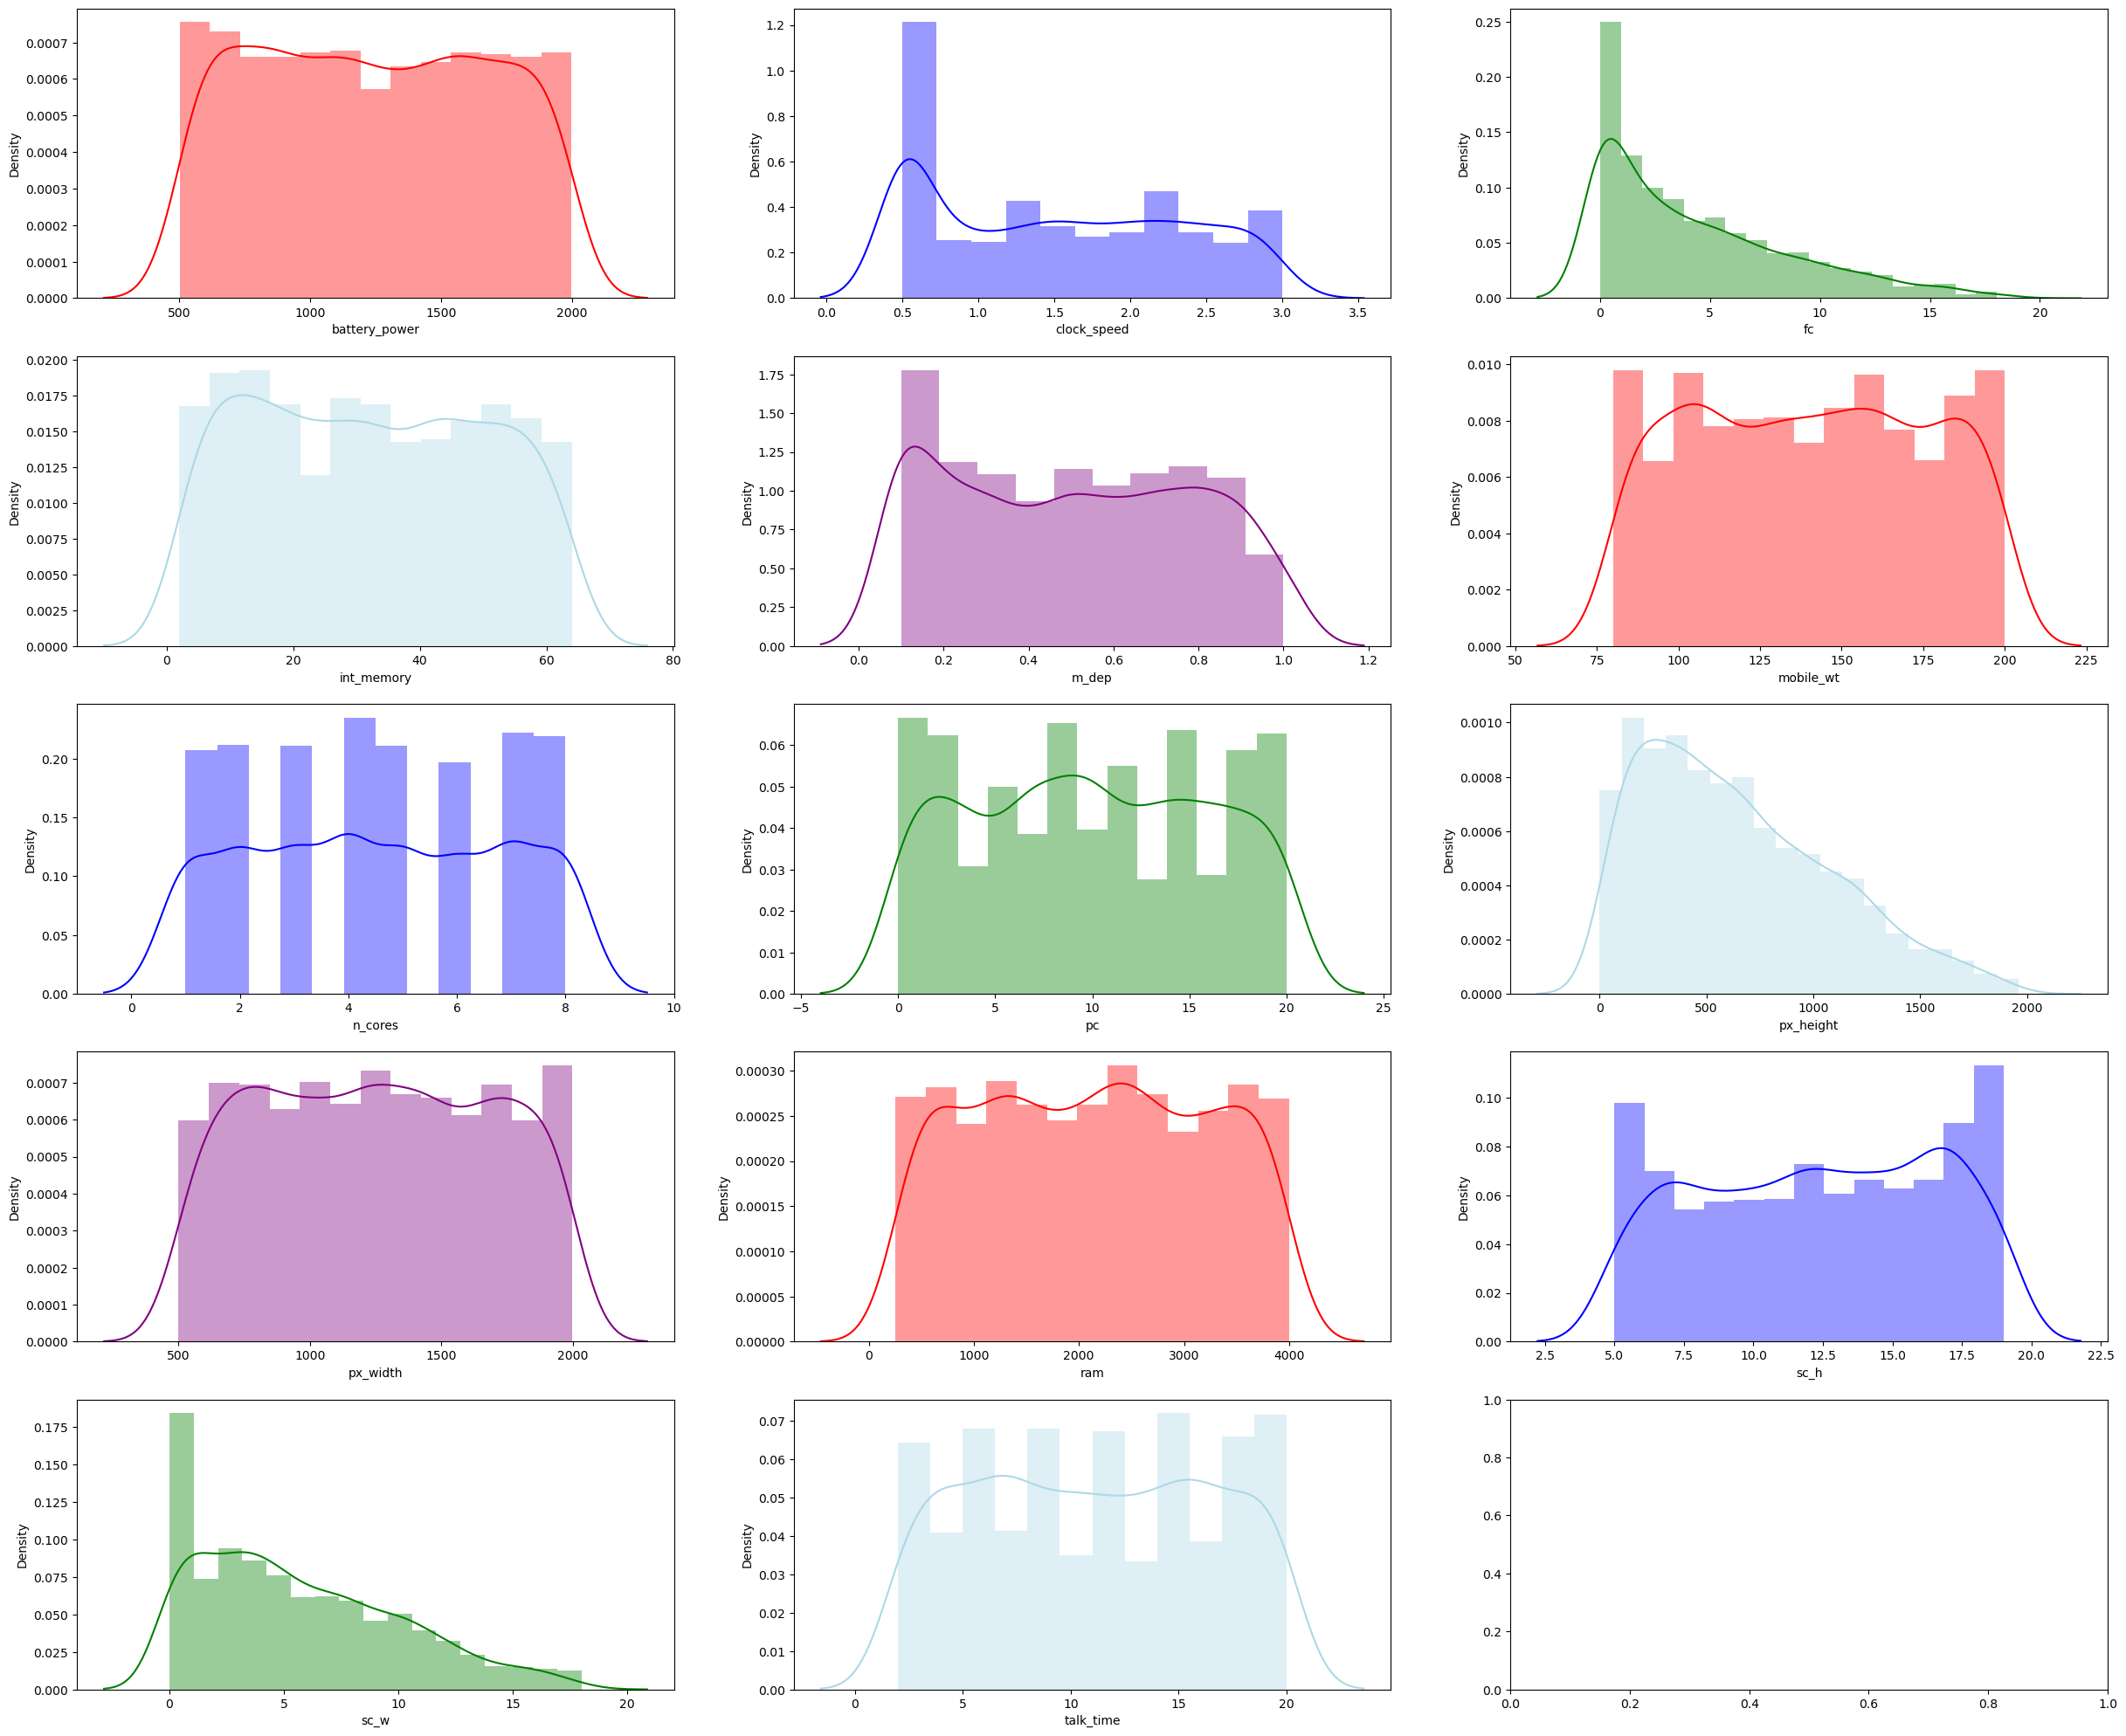

In [12]:
n_rows = 5
n_cols = 3
colors = ['red','blue', 'green', 'lightblue', 'purple']
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
for i, column in enumerate(x.columns):
    sns.distplot(df[column], ax=axes[i // n_cols, i % n_cols], color=colors[i % n_rows])
plt.show()

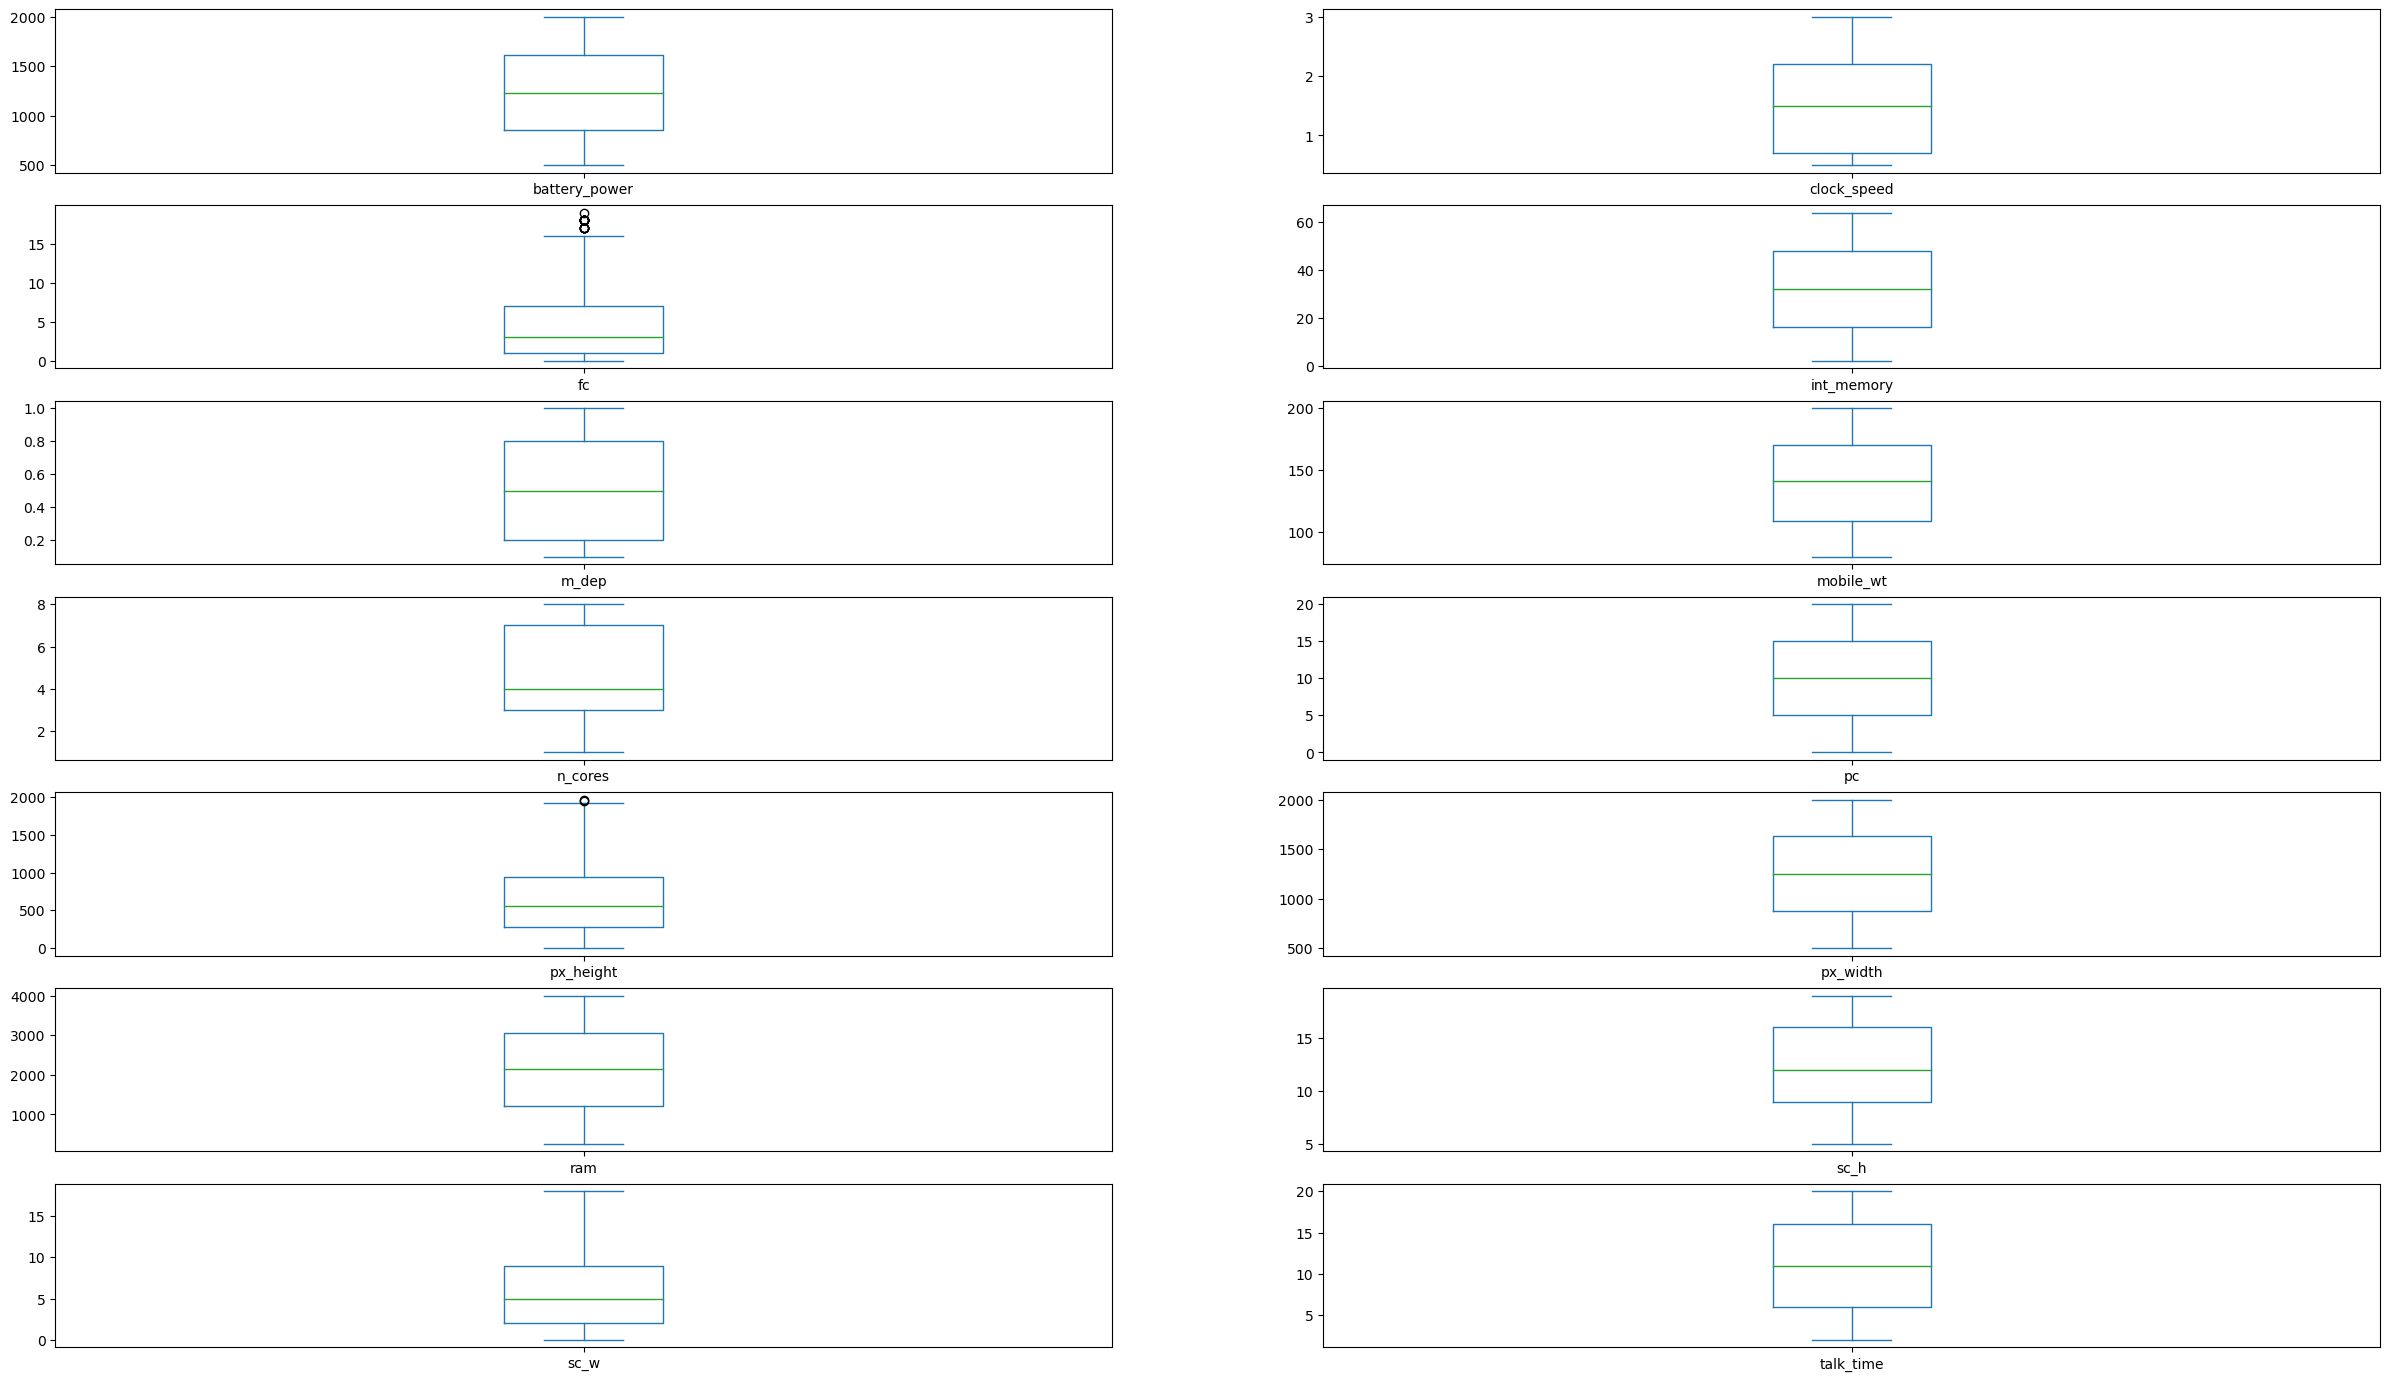

In [13]:
plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='box', subplots=True, layout=(10,2), sharex=False, sharey=False)
plt.show()

As we can see the outliers occurs in fc and px_height ,so we have to remove the outliers

In [14]:
#df.boxplot(column=["px_height"])
#plt.show()

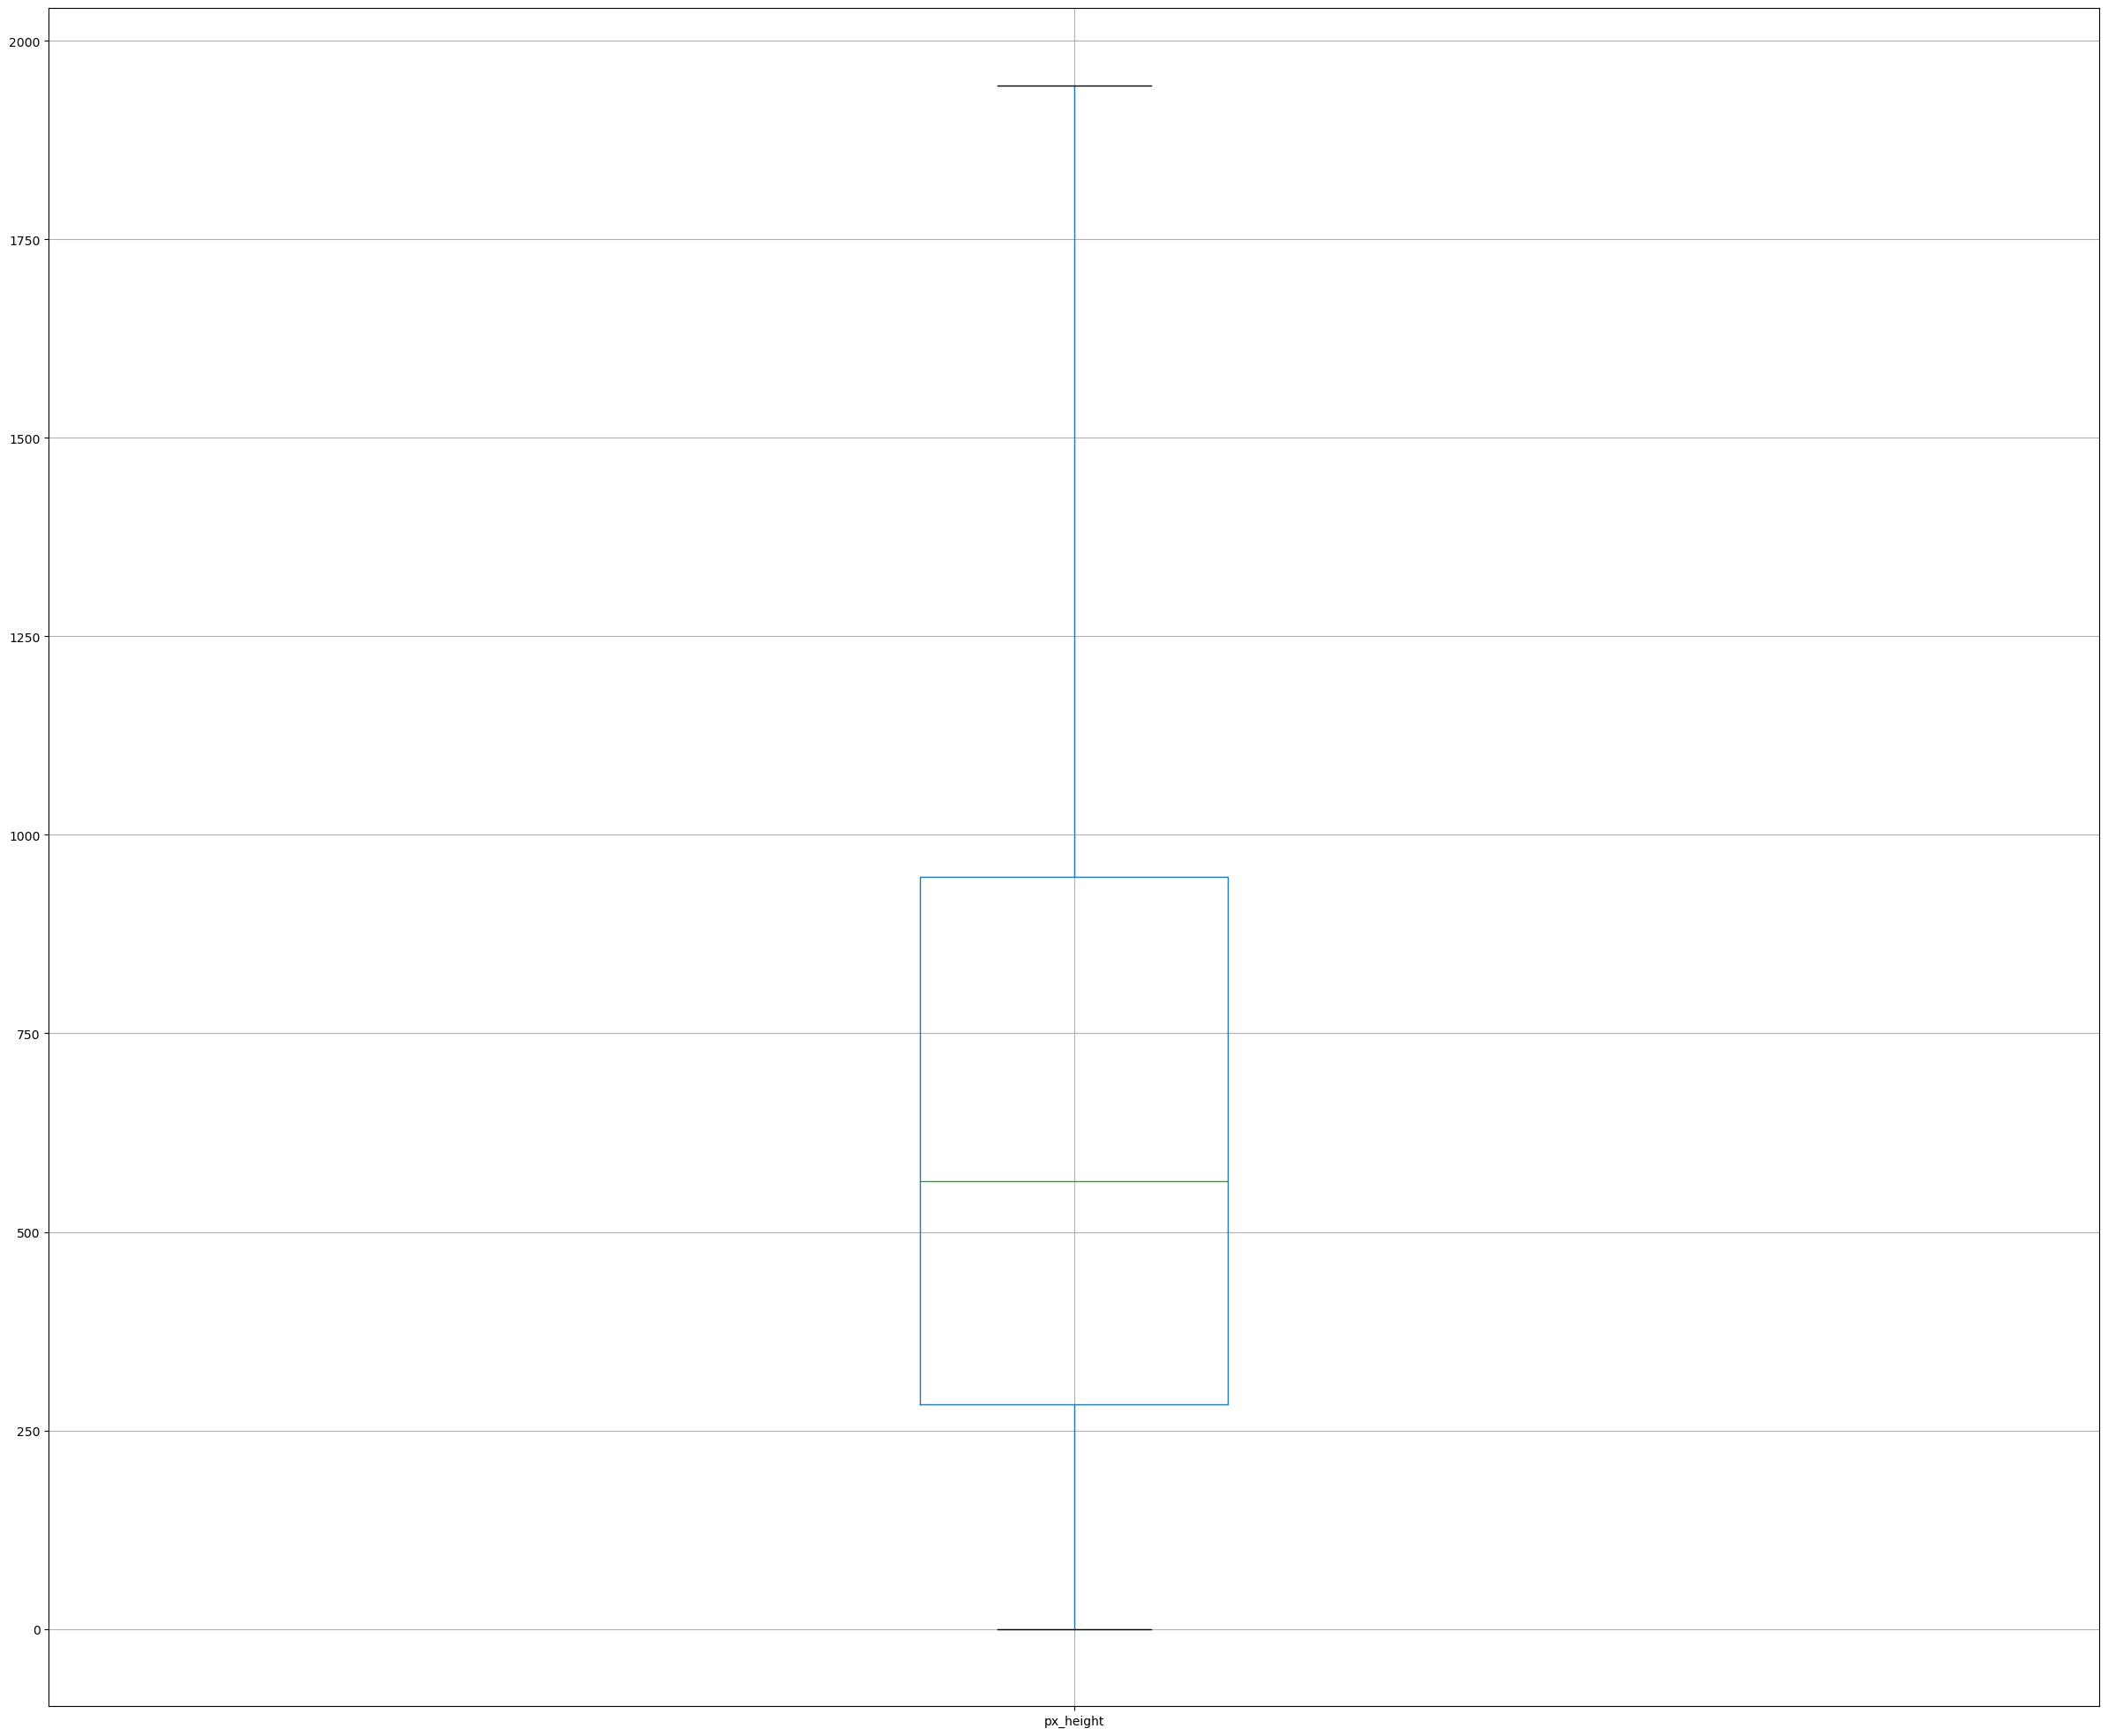

In [15]:
def removeout(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur
lowlead_time,uplead_time=removeout(df["px_height"])
df["px_height"]=np.where(df["px_height"]>uplead_time,uplead_time,df["px_height"])
df["px_height"]=np.where(df["px_height"]<lowlead_time,lowlead_time,df["px_height"])
df.boxplot(column=["px_height"])
plt.show()

In [16]:
#df.boxplot(column=["fc"])
#plt.show()

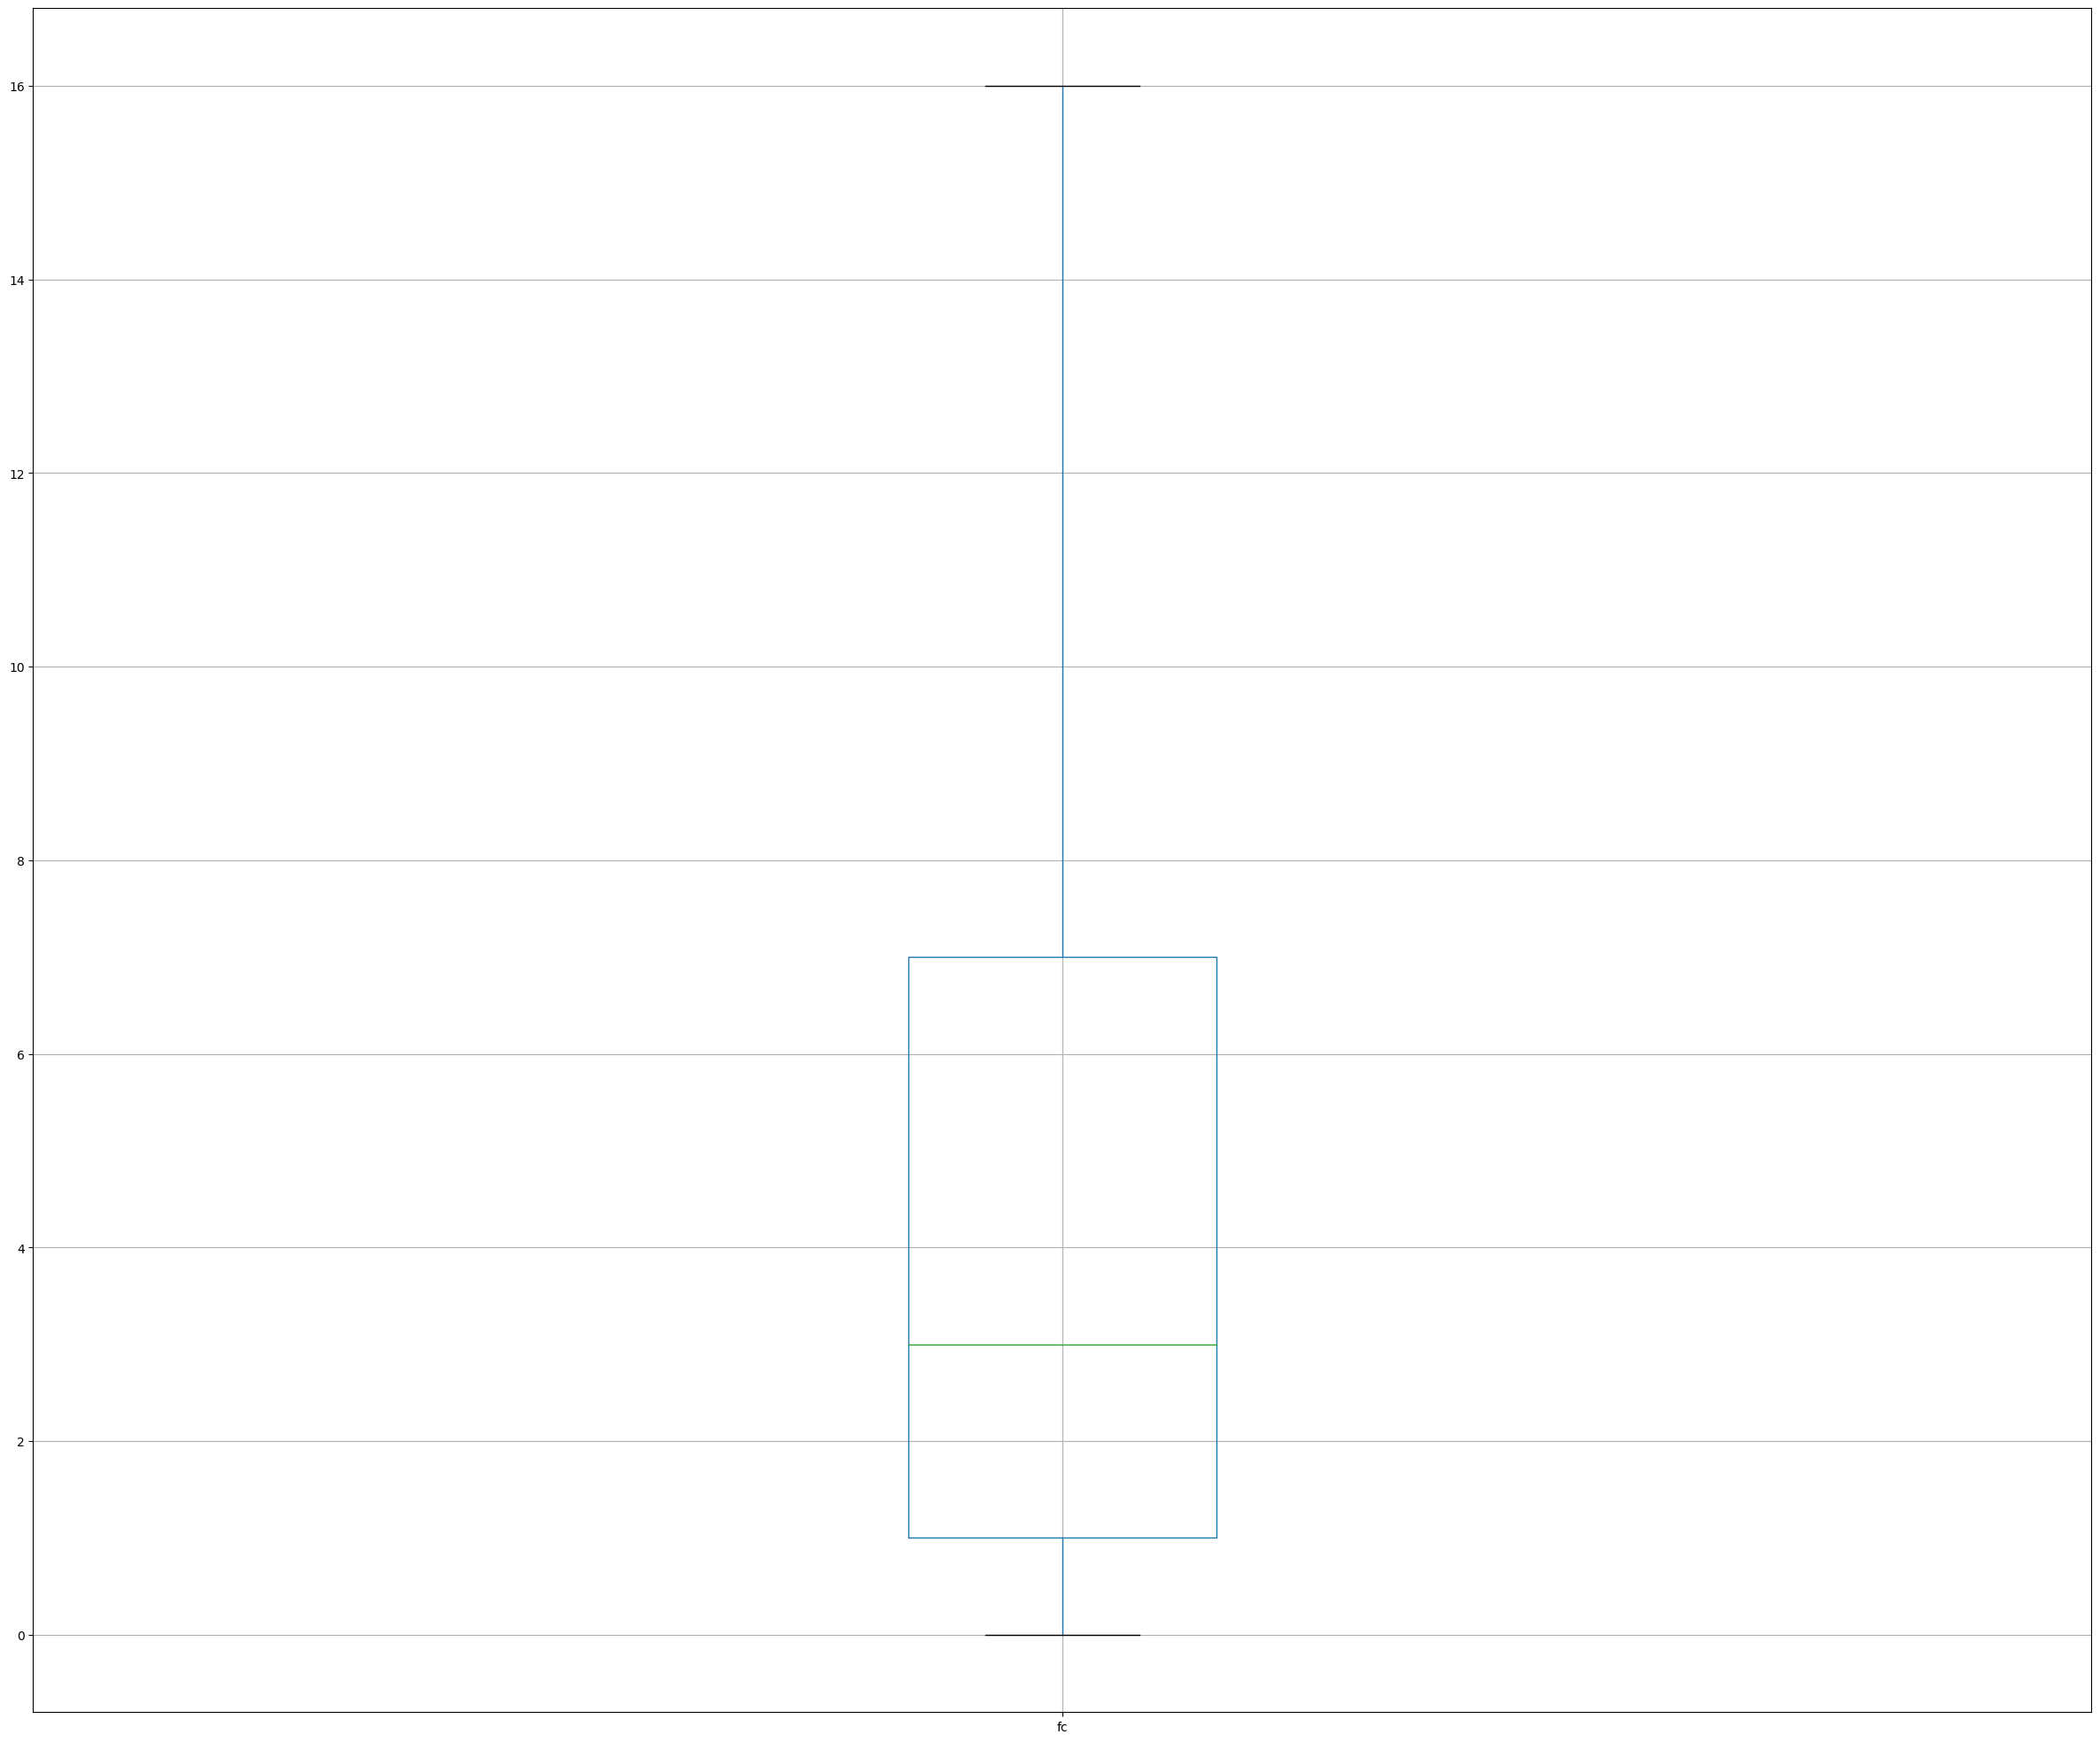

In [17]:
def removeout(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur
lowlead_time,uplead_time=removeout(df["fc"])
df["fc"]=np.where(df["fc"]>uplead_time,uplead_time,df["fc"])
df["fc"]=np.where(df["fc"]<lowlead_time,lowlead_time,df["fc"])
df.boxplot(column=["fc"])
plt.show()

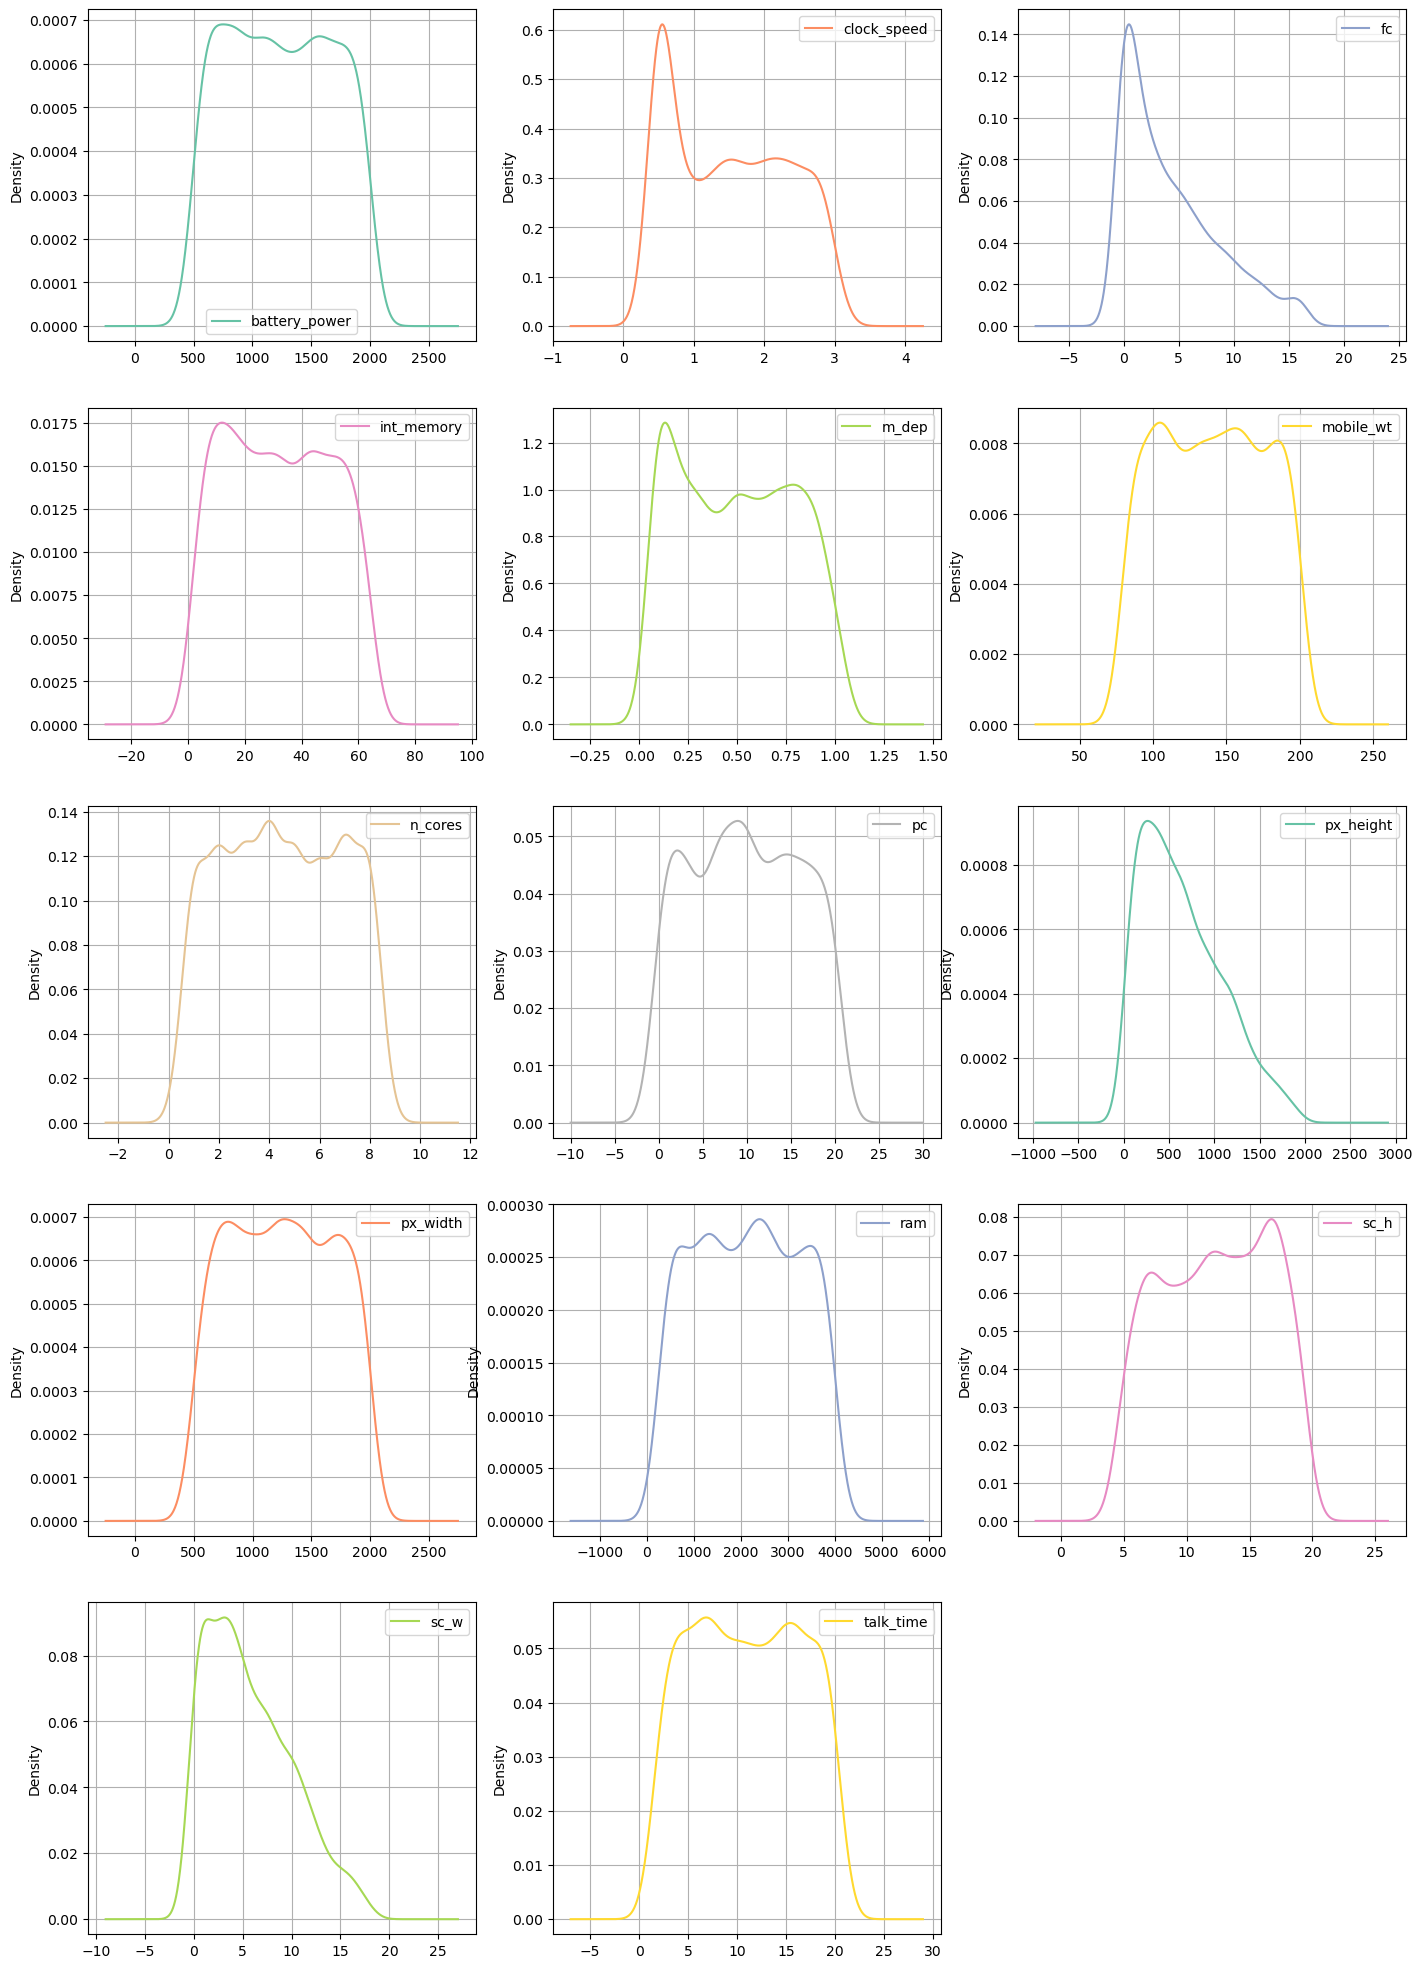

In [18]:
plt.rcParams['figure.figsize']=(30,25)
colors = sns.color_palette("Set2")
df.plot(kind='density',subplots=True, layout=(5,3), sharex=False, sharey=False , figsize =(17,25) , color = colors, grid = True )
plt.show()

In [19]:
df.dtypes

battery_power      int64
clock_speed      float64
fc               float64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height        float64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range       object
dtype: object

### Univariate

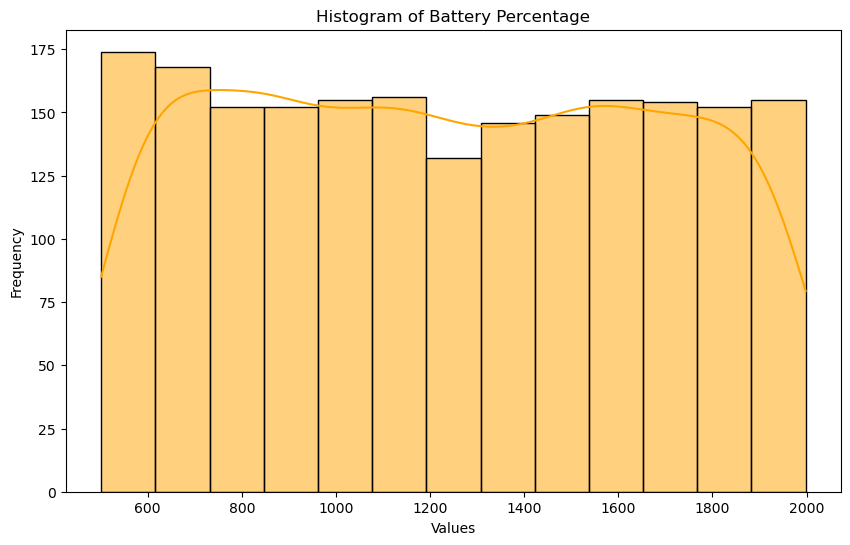

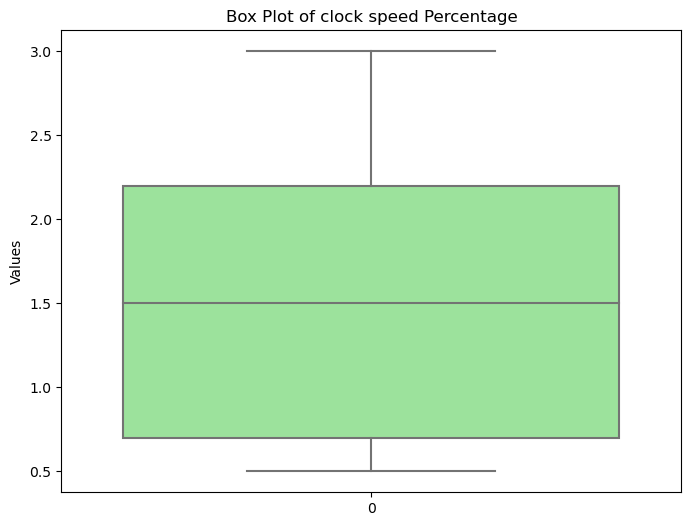

In [20]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["battery_power"], kde=True,color="orange")
plt.title('Histogram of Battery Percentage')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df["clock_speed"],color="lightgreen")
plt.title('Box Plot of clock speed Percentage')
plt.ylabel('Values')
plt.show()

### Bivariate

<Axes: xlabel='int_memory', ylabel='Density'>

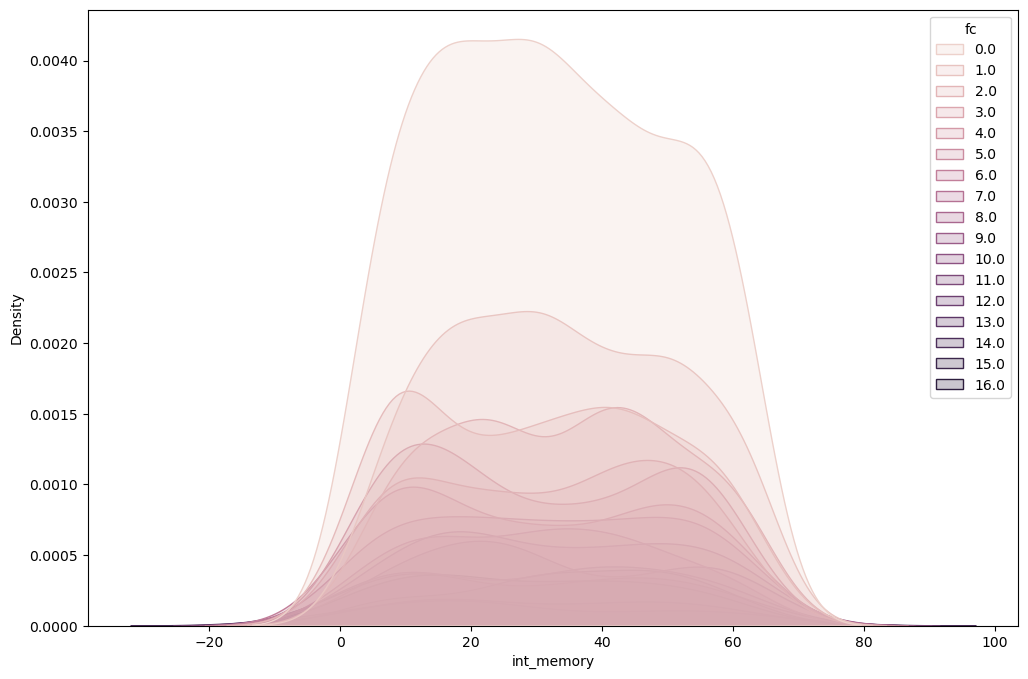

In [21]:
#kdeplot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df,x="int_memory",hue="fc",fill=True)


### Multivariate

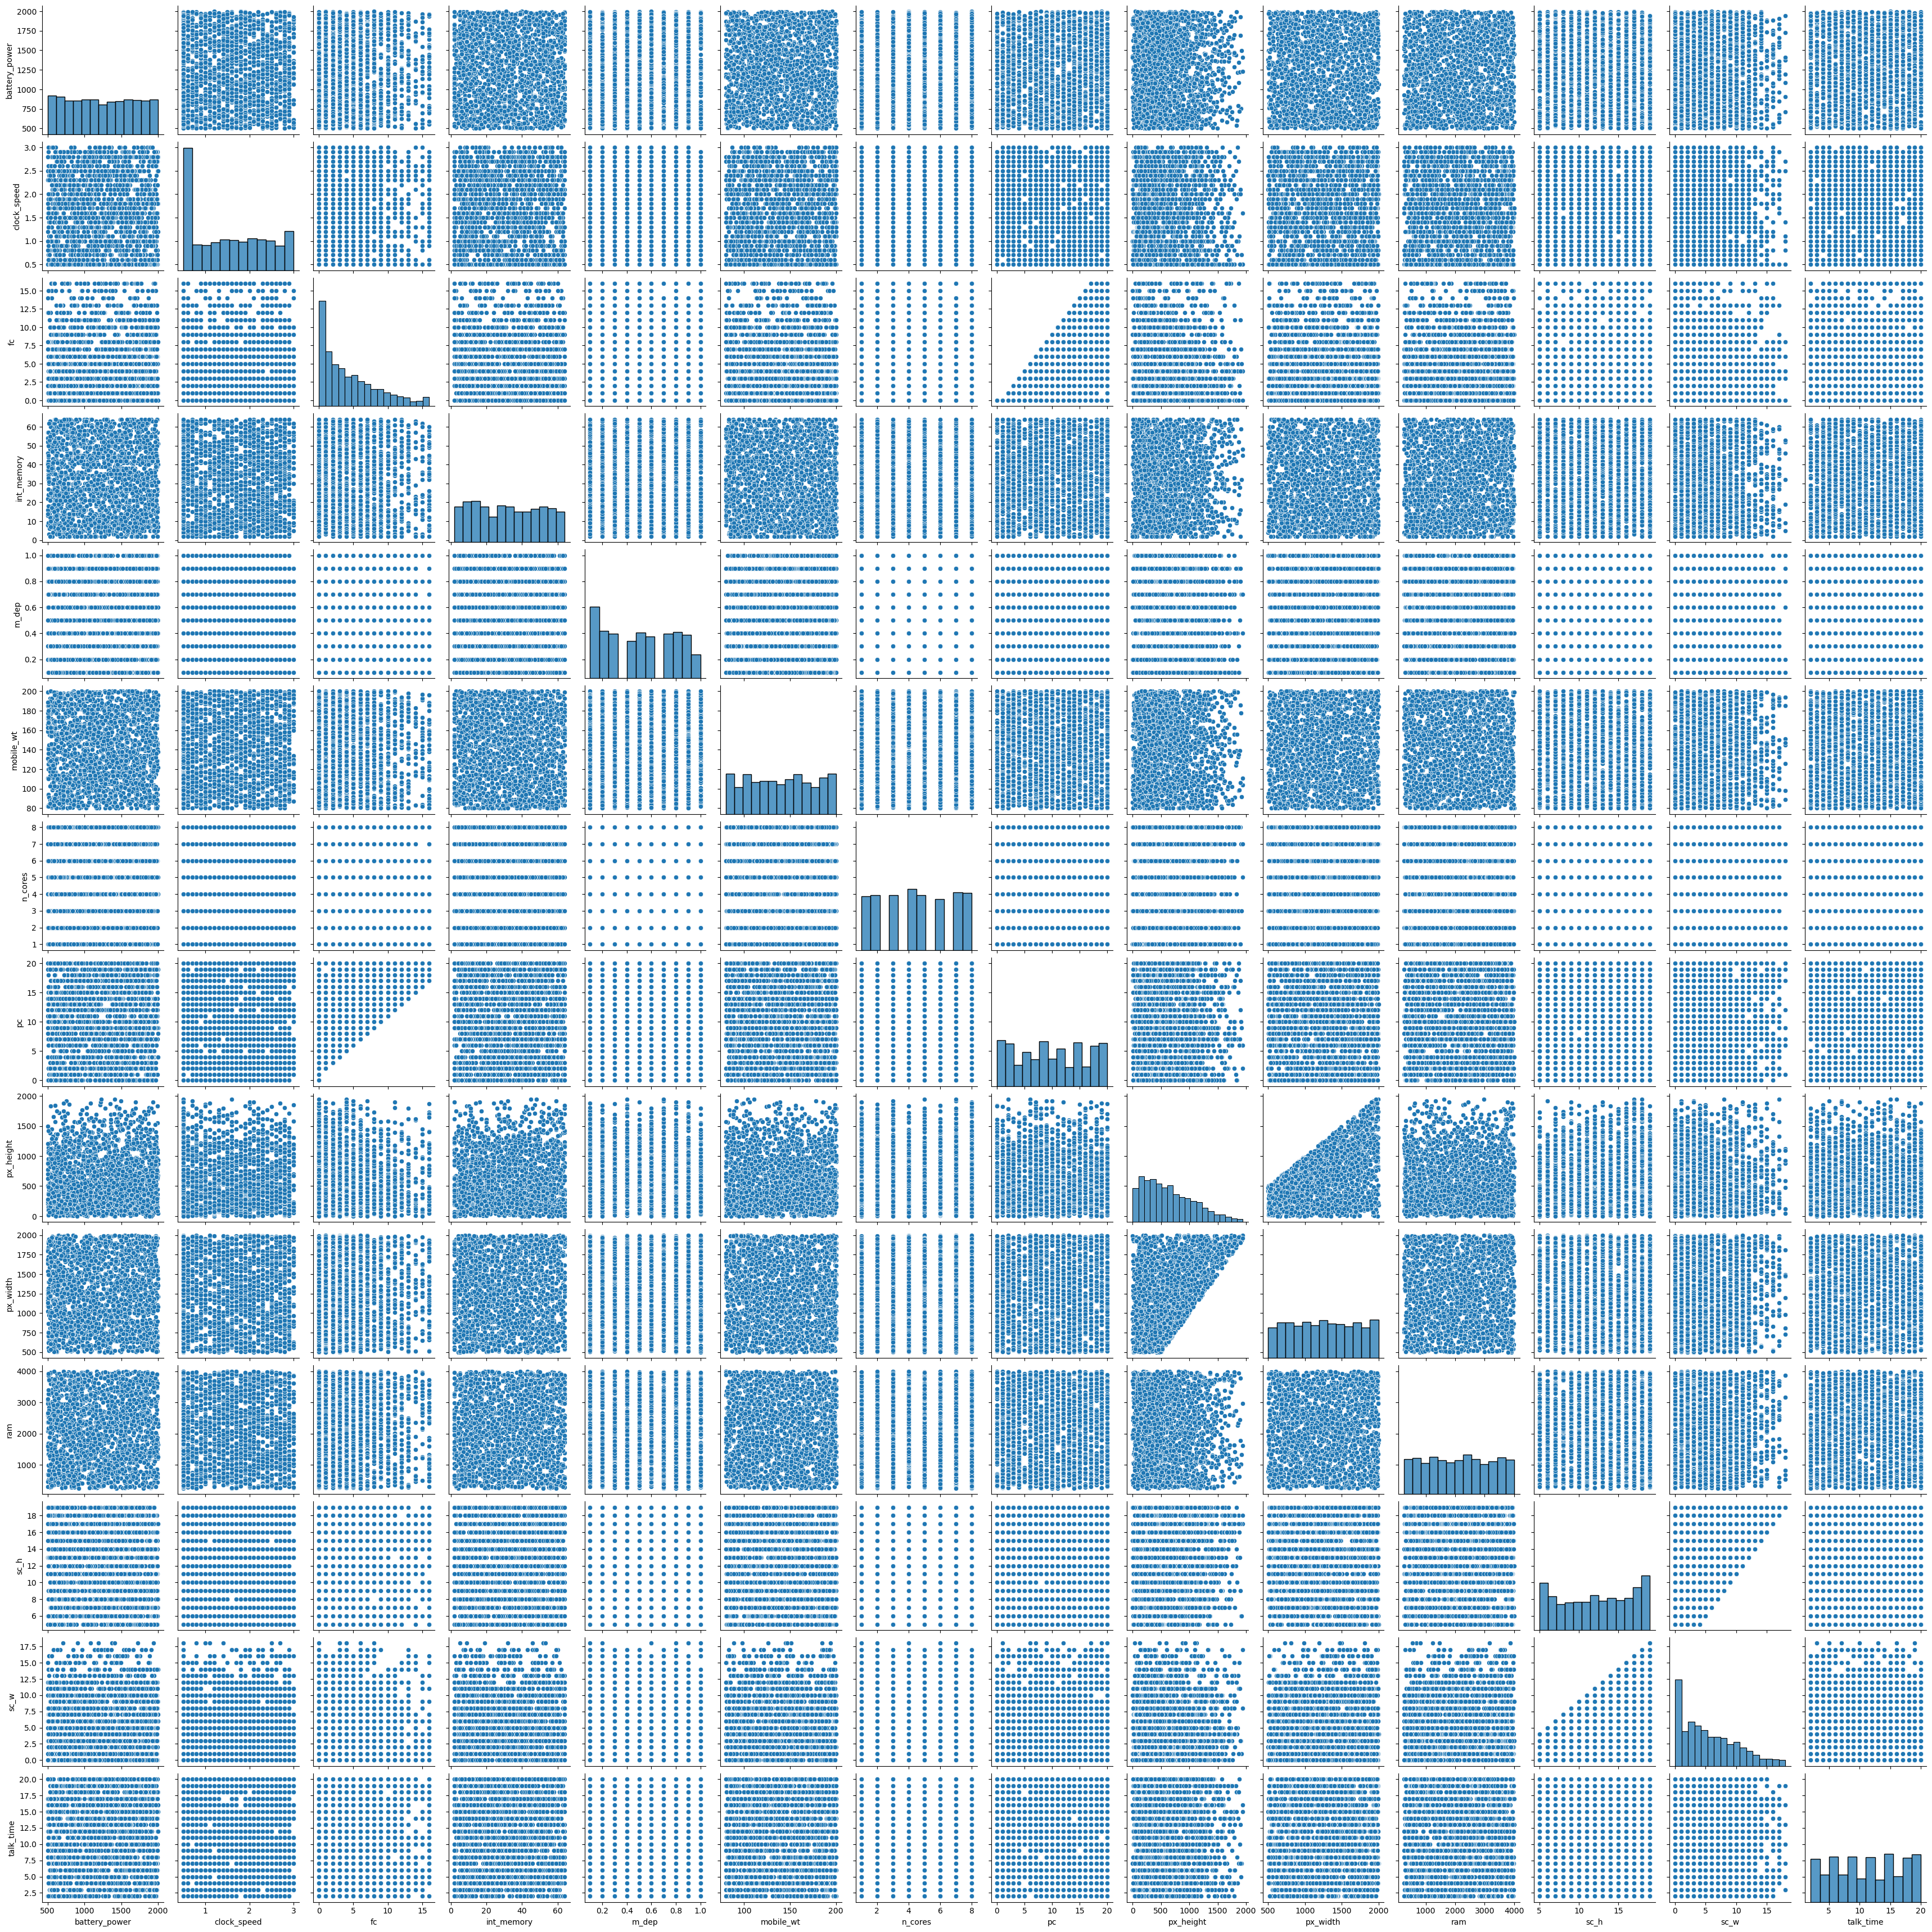

In [22]:
sns.pairplot(data=df)

### Model Building

In [23]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[-0.90259726,  0.83077942, -0.76249466, ..., -0.78498329,
         0.2831028 ,  1.46249332],
       [-0.49513857, -1.2530642 , -0.99289039, ...,  1.11426556,
        -0.63531667, -0.73426721],
       [-1.5376865 , -1.2530642 , -0.53209893, ..., -0.31017108,
        -0.86492153, -0.36814045],
       ...,
       [ 1.53077336, -0.76274805, -0.76249466, ..., -0.78498329,
        -1.0945264 , -1.10039396],
       [ 0.62252745, -0.76274805, -0.07130748, ...,  1.35167167,
         0.9719174 ,  1.46249332],
       [-1.65833069,  0.58562134,  0.15908825, ...,  1.58907778,
        -0.4057118 , -1.6495841 ]])

In [26]:
X_train,Y_train,X_test,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
neighbors=list(range(1,10,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [28]:
MSE=[1-x for x in cv_scores]
MSE

[0.09099999999999997,
 0.07499999999999996,
 0.0764999999999999,
 0.0734999999999999,
 0.07199999999999984]

In [29]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

9

Text(0, 0.5, 'Error')

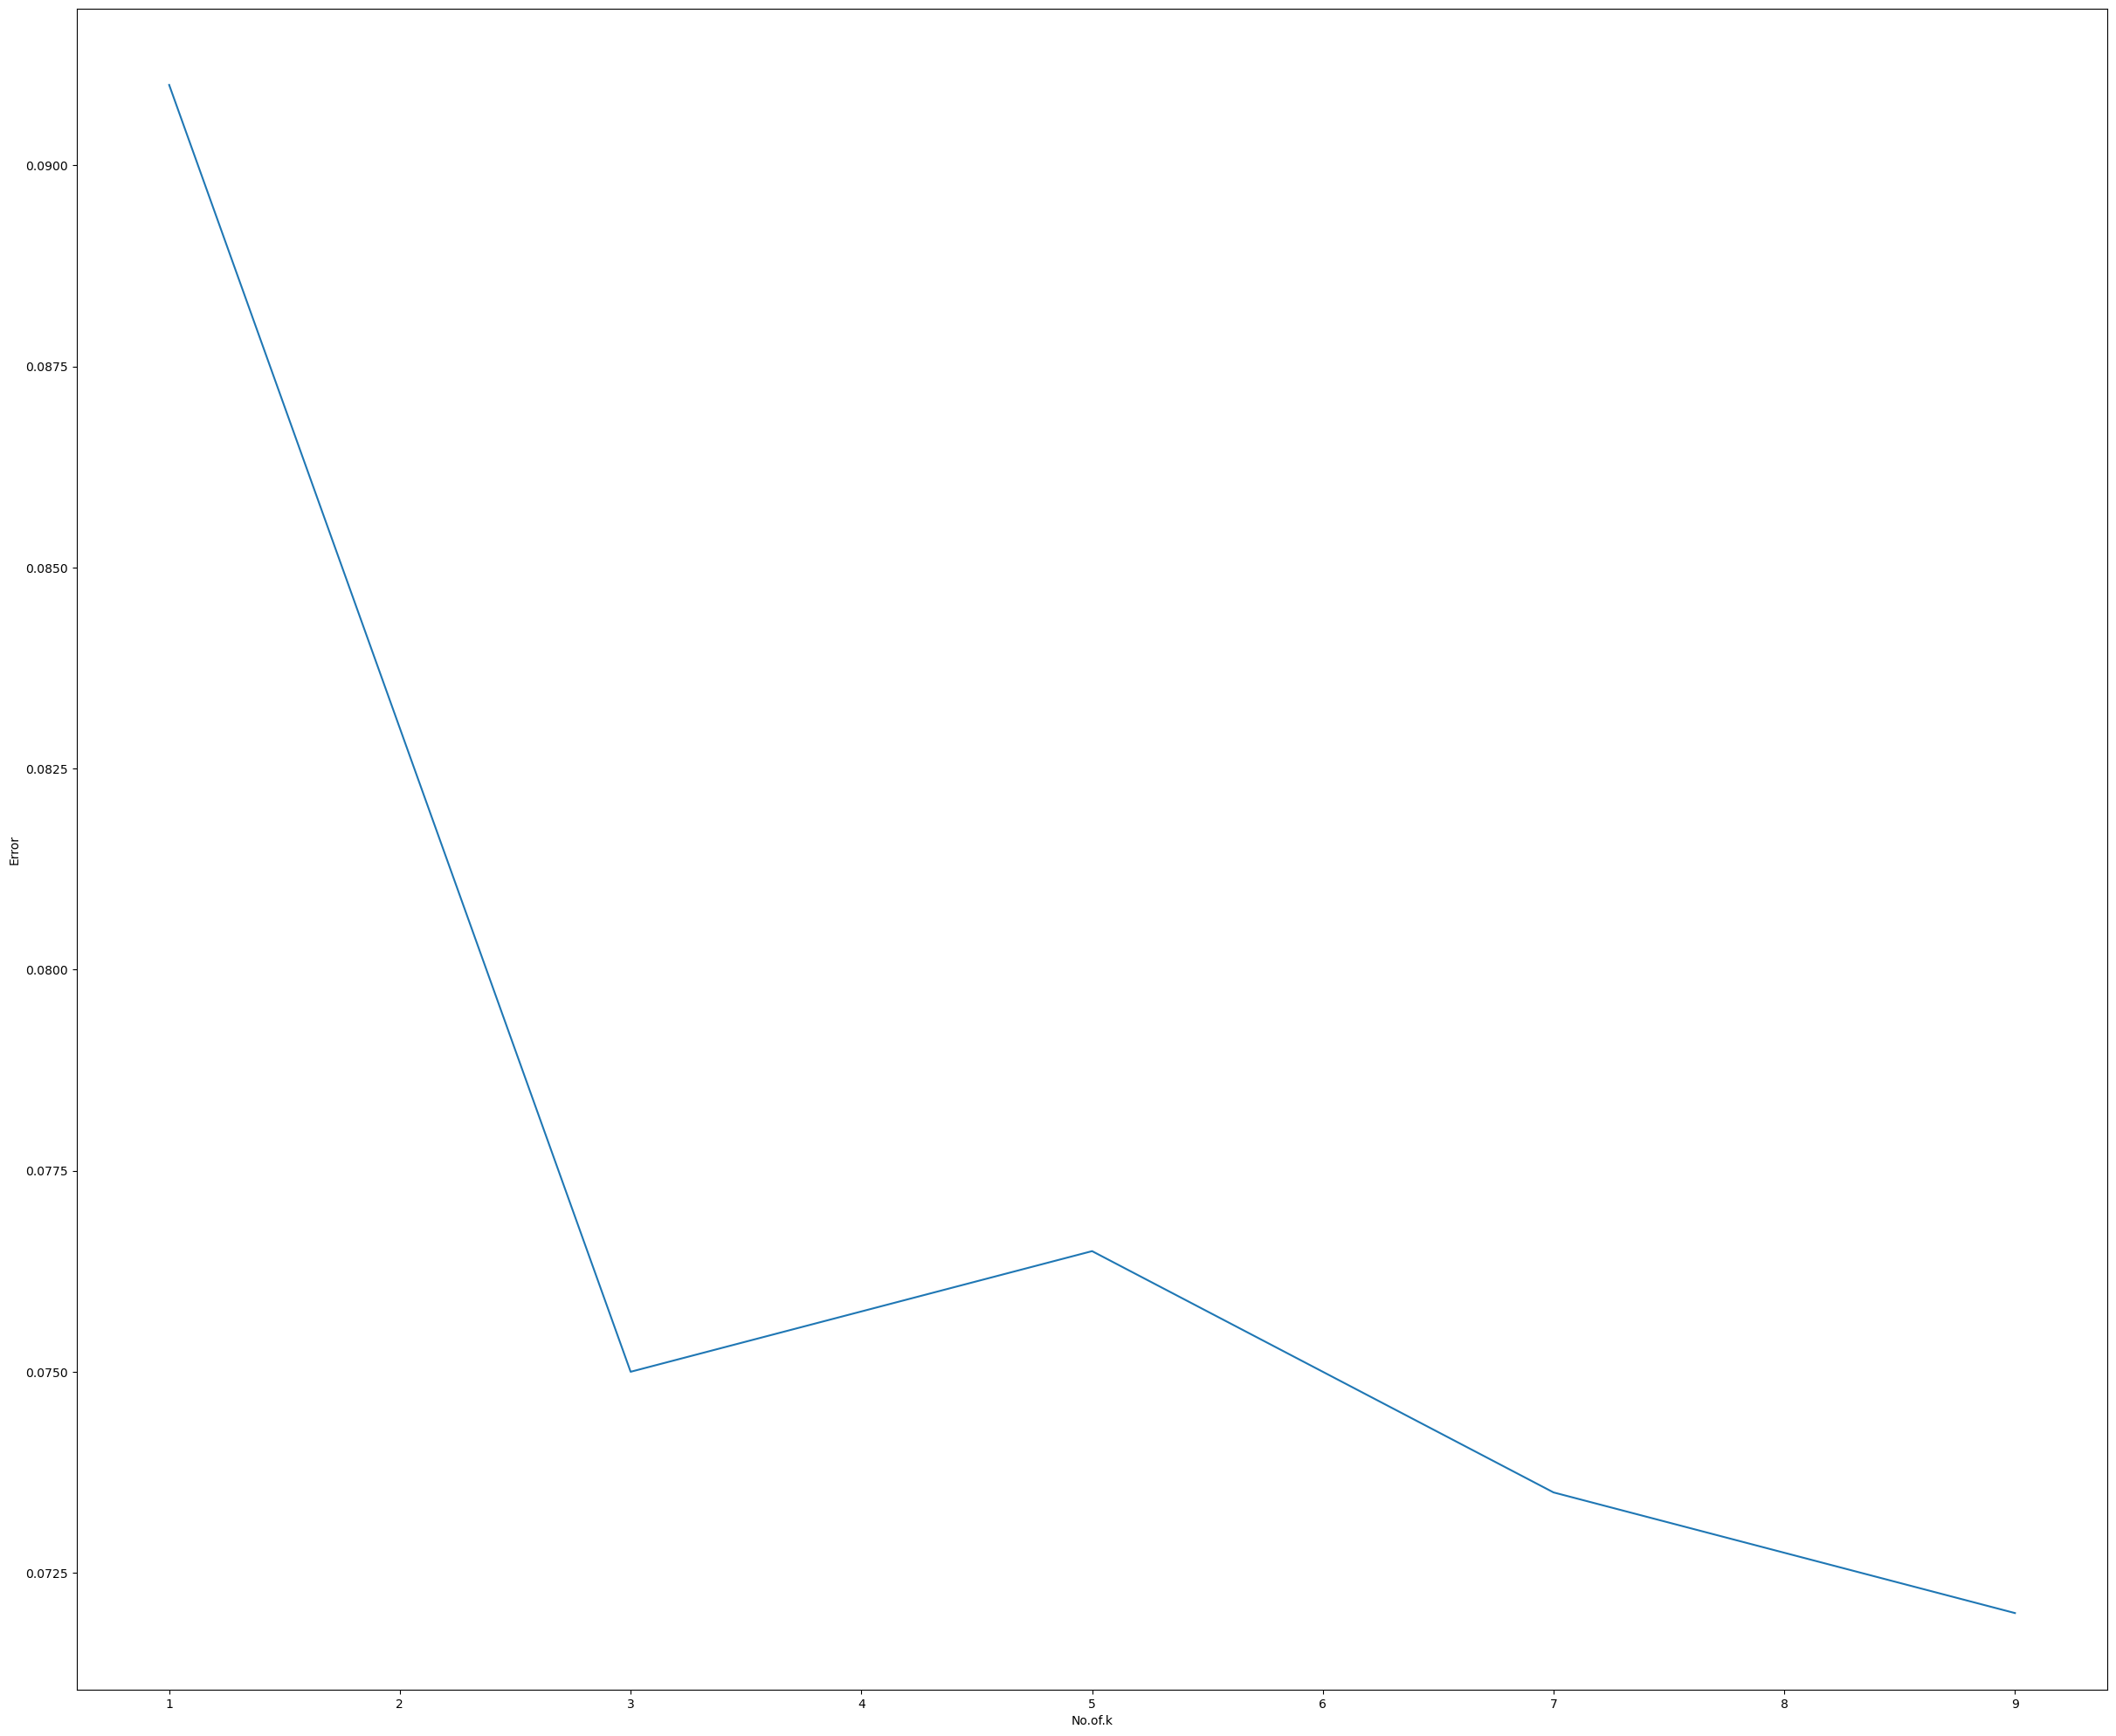

In [30]:
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

### KN Classifier

In [31]:
model_1=KNeighborsClassifier(n_neighbors=9)
model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [32]:
model_1.score(x_train,y_train)

0.9464285714285714

In [33]:
model_1.score(x_test,y_test)

0.94

In [34]:
predictions=model_1.predict(x_test)

In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,predictions)

0.94

In [37]:
def calculate_confusion_matrix(y_true, y_pred, num_classes):
    TP = [0] * num_classes
    TN = [0] * num_classes
    FP = [0] * num_classes
    FN = [0] * num_classes
    for true_label, pred_label in zip(y_true, y_pred):
        for i in range(num_classes):
            if pred_label == i and true_label == i:
                TP[i] += 1
            elif pred_label != i and true_label != i:
                TN[i] += 1
            elif pred_label == i and true_label != i:
                FP[i] += 1
            elif pred_label != i and true_label == i:
                FN[i] += 1
    return TP, TN, FP, FN

In [38]:
TP, TN, FP, FN = calculate_confusion_matrix(y_test, predictions,4)
for i in range(4):
    print(f"Class {i} - TP: {TP[i]}, TN: {TN[i]}, FP: {FP[i]}, FN: {FN[i]}")

Class 0 - TP: 151, TN: 442, FP: 7, FN: 0
Class 1 - TP: 125, TN: 458, FP: 7, FN: 10
Class 2 - TP: 135, TN: 436, FP: 13, FN: 16
Class 3 - TP: 153, TN: 428, FP: 9, FN: 10


<Axes: >

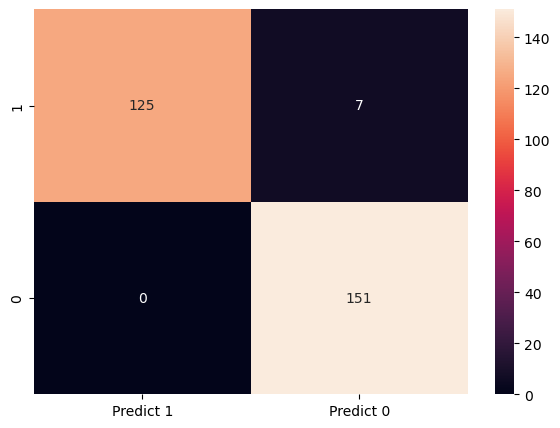

In [39]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt="g")

### DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model_1=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [42]:
model_1.score(x_train,y_train)

0.7678571428571429

In [43]:
model_1.score(x_test,y_test)

0.7516666666666667

In [44]:
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [45]:
df["price_range"].unique()

array(['medium cost', 'high cost', 'very highcost', 'low cost'],
      dtype=object)

In [46]:
train_char_label = ['medium cost', 'high cost', 'very highcost', 'low cost']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(model_1, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()